In [1]:
%matplotlib notebook

In [2]:
import numpy as np
from numpy import log, arctan2, pi, mean
from numpy.linalg import norm, solve
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import meshio
from bem import assem, influence_coeff, eval_sol

Now, let us run a simulation.

In [3]:
mesh = meshio.read("files/square.msh")
elems = np.vstack([cells.data for cells in mesh.cells[0:4]])
bound_nodes = list(set(elems.flatten()))
coords = mesh.points[bound_nodes, :2]
x, y = coords.T
x_m, y_m = 0.5*(coords[elems[:, 0]] + coords[elems[:, 1]]).T
u_boundary = np.exp(x_m) * np.sin(y_m)

<IPython.core.display.Javascript object>


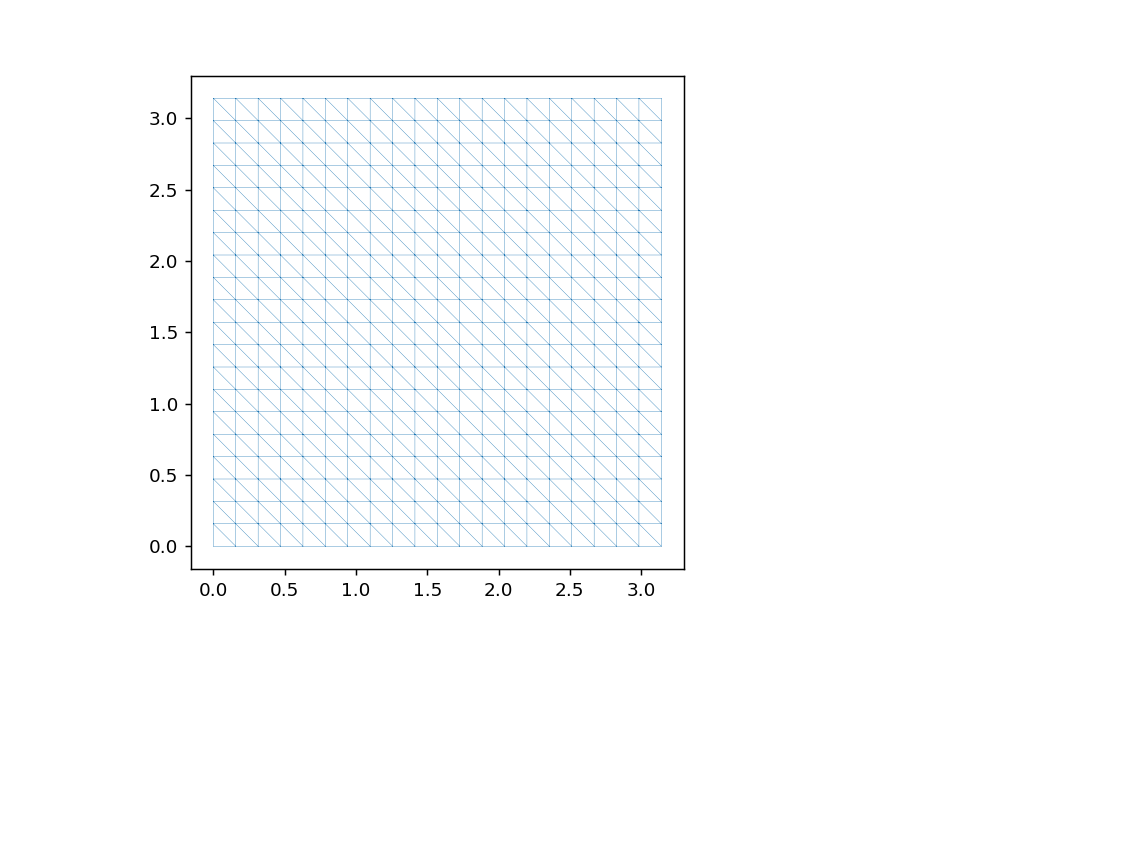

In [4]:
plt.figure()
plt.triplot(*mesh.points[:, :2].T, mesh.cells[4].data, lw=0.2)
plt.axis("square");

In [5]:
Gmat, Fmat = assem(coords, elems)

If $f(x, y) = e^x \sin y$ the flow is given by

$$q = - \nabla u = e^x (\sin y, \cos y)\, ,$$

and the projections in the square sides are

\begin{align}
&q_\text{right} = e^\pi \sin y\, ,\\
&q_\text{left} = \sin y\, ,\\
&q_\text{top} = e^x \, ,\\
&q_\text{bottom} = e^x\, .\\
\end{align}

In [6]:
q_boundary_num = solve(Gmat, Fmat.dot(u_boundary))

In [7]:
q_boundary =  np.zeros_like(x_m)

In [8]:
q_boundary[y_m == 0] = np.exp(x_m[y_m == 0])

In [9]:
q_boundary[x_m == np.pi] = -np.exp(np.pi) * np.sin(y_m[x_m == np.pi])

In [10]:
q_boundary[y_m == np.pi] = np.exp(x_m[y_m == np.pi])

In [11]:
q_boundary[x_m == 0] = np.sin(y_m[x_m == 0])

In [12]:
ev_coords =  mesh.points[:, :2]
ev_x, ev_y = ev_coords.T
solution = np.zeros(ev_coords.shape[0])
solution = eval_sol(ev_coords, coords, elems, u_boundary, q_boundary)
solution[bound_nodes] = np.exp(ev_x[bound_nodes]) * np.sin(ev_y[bound_nodes])

Visualization

<IPython.core.display.Javascript object>


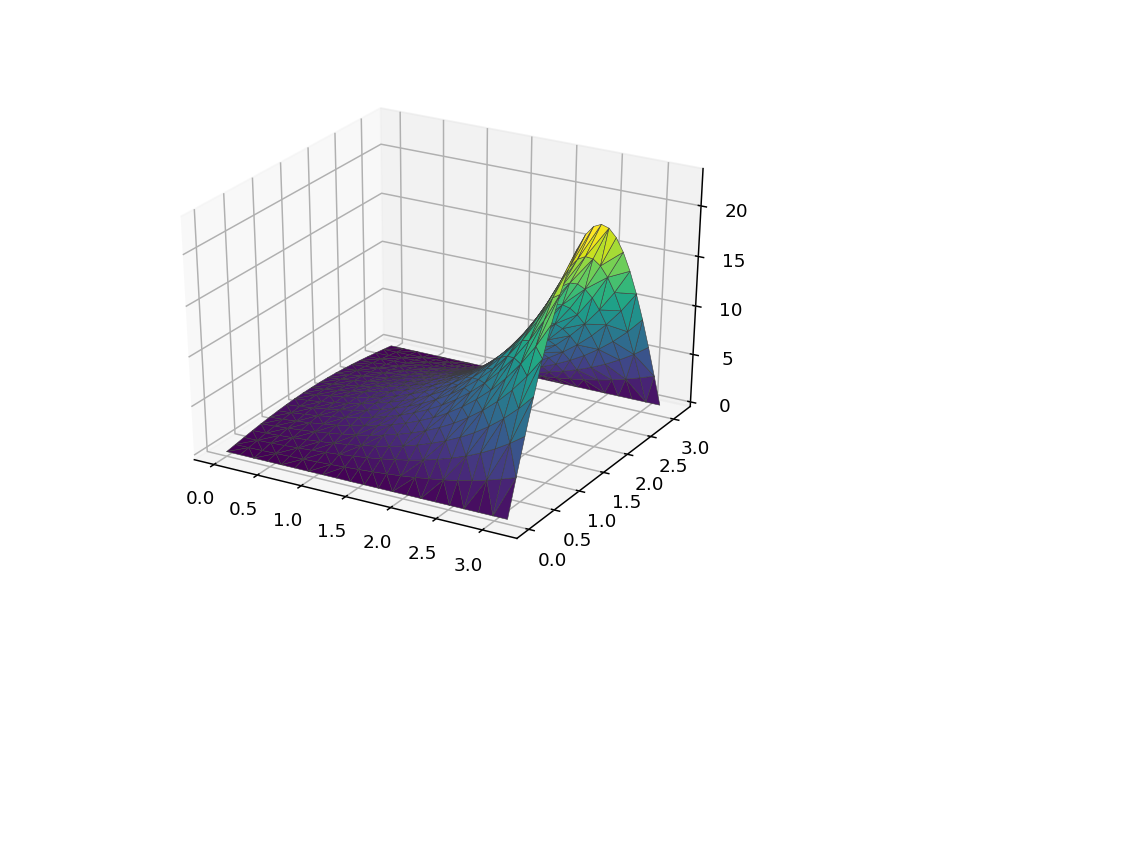

In [13]:
tris = mesh.cells[4]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(ev_x, ev_y, solution, cmap="viridis", lw=0.3,
                edgecolor="#3c3c3c")
# plt.xticks([])
# plt.yticks([])
# ax.set_zticks([])

## Analytical solution

In this case, we can check that the solution is

$$u = e^x \sin y\, .$$

In [14]:
sol_analytic = np.exp(ev_x) * np.sin(ev_y )

<IPython.core.display.Javascript object>


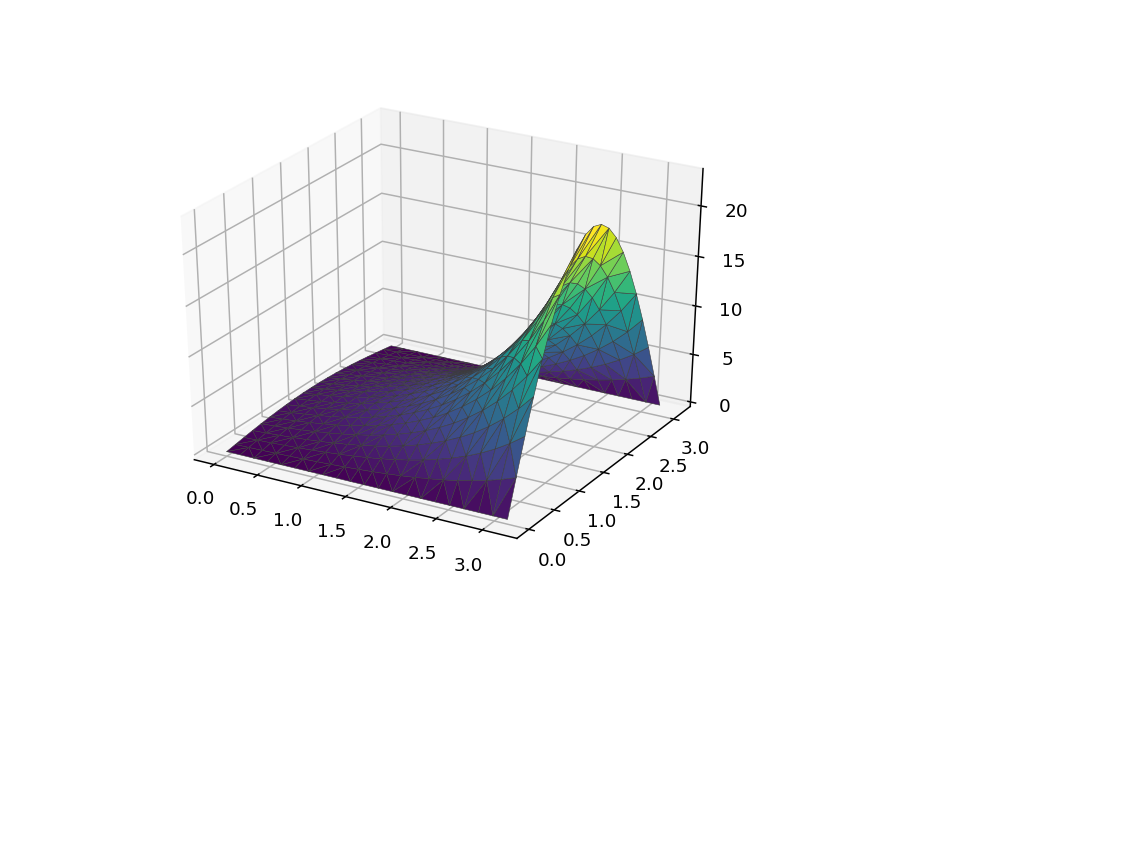

In [15]:
tris = mesh.cells[4]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(ev_x, ev_y, sol_analytic, cmap="viridis", lw=0.3,
                edgecolor="#3c3c3c")
# plt.xticks([])
# plt.yticks([])
# ax.set_zticks([])

<IPython.core.display.Javascript object>


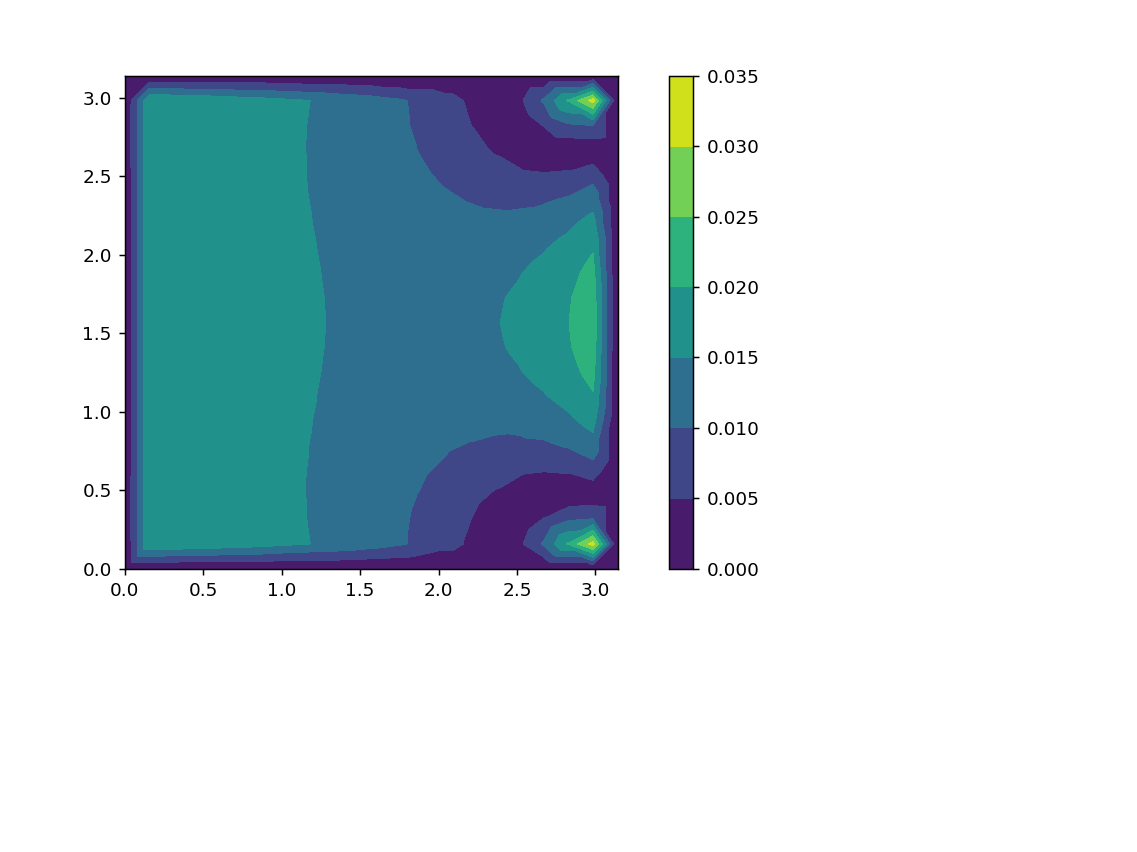

In [16]:
tris = mesh.cells[4]
fig = plt.figure()
plt.tricontourf(ev_x, ev_y, np.abs(sol_analytic - solution),
                cmap="viridis")
plt.colorbar()
plt.axis("image");

In [17]:
rel_error = 100*np.linalg.norm(sol_analytic - solution)/np.linalg.norm(sol_analytic)
rel_error

0.20005277073757463